# Exploring Text Data

Consumer Complaint Database from Consumer Financial Protection Bureau

# Setup Dependencies

In [1]:
# dependencies
import numpy as np
import pandas as pd

# VISUALIZATION
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno

# NLP
from wordcloud import WordCloud
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sqlalchemy import (create_engine, MetaData)

# Load the data


In [2]:
DATA_PATH = '../data/consumer_complaints.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

/Users/deniel.horvatic/repository/machine-learning-masterclass/project_16_call_center_nlp/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Just take a sample size of 1000
df = df[:100000]

In [5]:
df.shape

(100000, 18)

In [6]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [7]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284


In [8]:
df.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
99995,10/29/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I have accounts reporting on my report that do...,NaN,"EQUIFAX, INC.",FL,333XX,NaN,Consent provided,Web,10/29/2018,Closed with explanation,Yes,NaN,3059043
99996,10/29/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,The company say I owe {$650.00} and I dont hav...,NaN,"CAINE & WEINER COMPANY, INC.",SC,291XX,NaN,Consent provided,Web,10/29/2018,Closed with explanation,Yes,NaN,3058882
99997,10/29/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,NaN,NaN,"EQUIFAX, INC.",CA,94591,NaN,Consent not provided,Web,10/29/2018,Closed with explanation,Yes,NaN,3059157
99998,10/29/2018,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,NaN,"IMPAC MORTGAGE HOLDINGS, INC.",CA,95838,"Older American, Servicemember",Consent not provided,Web,10/29/2018,Closed with explanation,Yes,NaN,3059855
99999,10/29/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Im a victim of identity thief someone got my i...,NaN,"EQUIFAX, INC.",NY,114XX,NaN,Consent provided,Web,10/29/2018,Closed with explanation,Yes,NaN,3059277


---
# Clean Table Creation
## Clean table Header

In [9]:
df.columns.values

array(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype=object)

In [10]:
header = {
    'Date received': 'date_received',
    'Product': 'product',
    'Sub-product':'sub_product',
    'Issue':'issue',
    'Sub-issue':'sub_issue',
    'Consumer complaint narrative':'consumer_complaint_narrative',
    'Company public response':'company_public_response',
    'Company':'company',
    'State':'state',
    'ZIP code':'zip_code',
    'Tags':'tags',
    'Consumer consent provided?':'is_consumer_consent_provided',
    'Submitted via':'submittted_via',
    'Date sent to company':'date_sent_to_company',
    'Company response to consumer':'company_response_to_consumer',
    'Timely response?':'timely_response',
    'Consumer disputed?':'consumer_disputed',
    'Complaint ID':'complaint_id',
}

In [11]:
clean_table = df

In [12]:
clean_table = clean_table.rename(columns = header)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284


---
# Enrich table with features
We need a column with coversions with zero or one as values. 

In [13]:
clean_table['conversion'] = np.random.randint(0, 2, clean_table.shape[0])
clean_table['conversion'].head()

0    0
1    1
2    0
3    0
4    1
Name: conversion, dtype: int64

We need a column with agent ids

In [14]:
clean_table['agent_id'] = np.random.randint(0, 10, clean_table.shape[0])
clean_table['agent_id'].head()

0    8
1    5
2    3
3    9
4    4
Name: agent_id, dtype: int64

# Standard Analysis - Numerical Values

In [15]:
# Not useful because we have no numeric values except the complaint_id
clean_table.describe()

,complaint_id,conversion,agent_id
count,1.000000e+05,100000.000000,100000.000000
mean,3.127495e+06,0.501820,4.497400
std,3.942517e+04,0.499999,2.865354
min,3.058817e+06,0.000000,0.000000
25%,3.093463e+06,0.000000,2.000000
50%,3.127416e+06,1.000000,4.000000
75%,3.161585e+06,1.000000,7.000000
max,3.205347e+06,1.000000,9.000000


In [16]:
# df.hist(xrot=-45, figsize=(14,14))
# plt.show()

# Standard Analysis - Categorical Values

In [17]:
# display summary statistics for categorial features
clean_table.describe(include=['object'])

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed
count,100000,100000,100000,100000,87191,30724,48205,100000,97016,85901,13574,61610,100000,100000,100000,100000,0.0
unique,162,9,48,78,160,28326,8,2281,60,8869,3,4,6,162,5,2,0.0
top,03/05/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,330XX,Servicemember,Consent provided,Web,12/11/2018,Closed with explanation,Yes,NaN
freq,1035,47164,46385,30115,16520,334,41735,13400,12626,1267,8930,30734,84593,1087,75264,98496,NaN


date_received


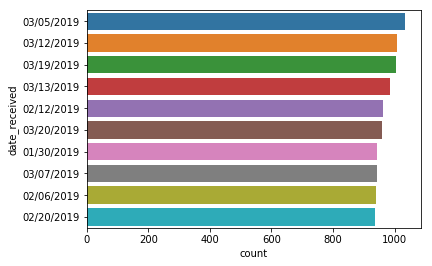

product


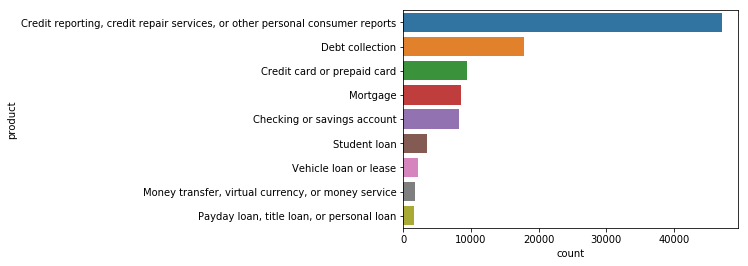

sub_product


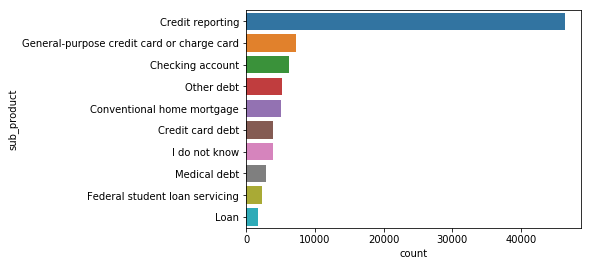

issue


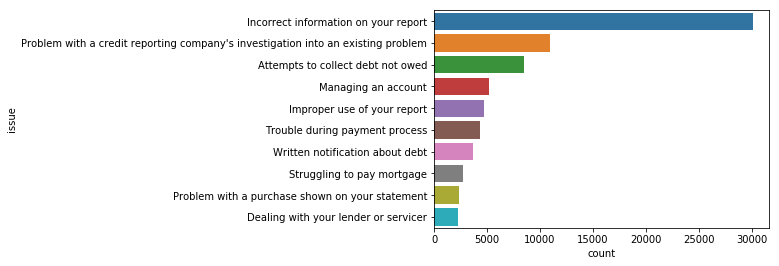

sub_issue


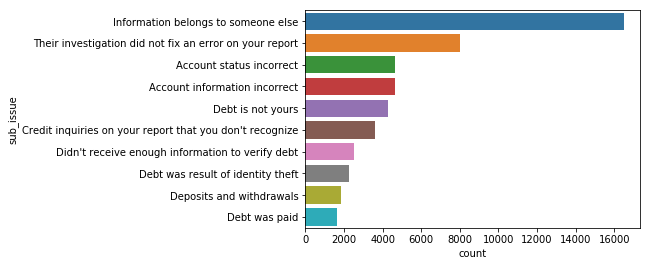

consumer_complaint_narrative


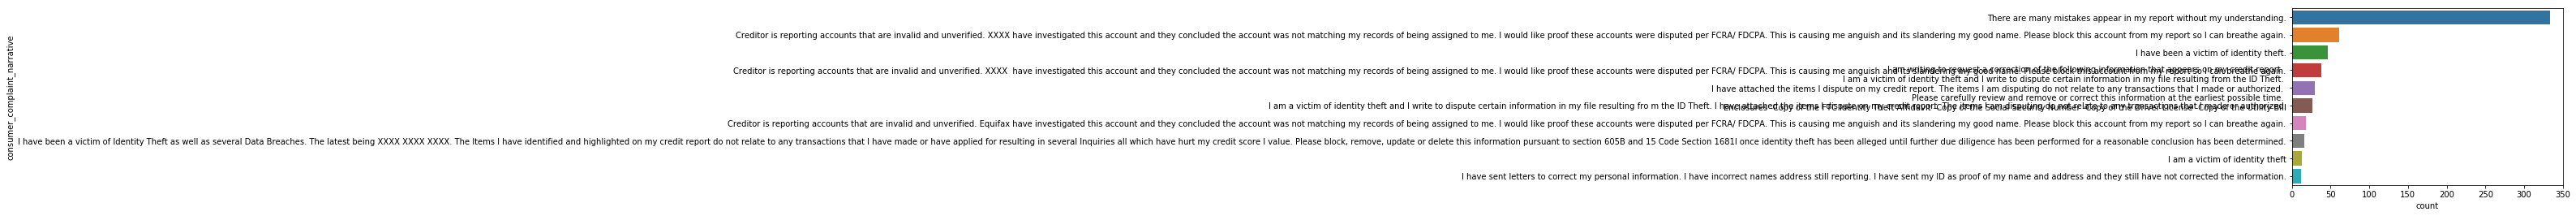

company_public_response


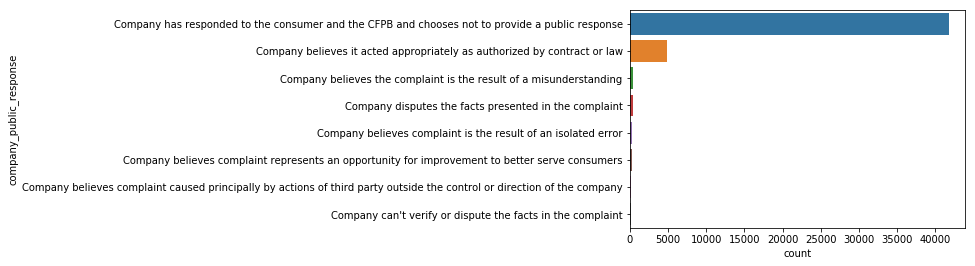

company


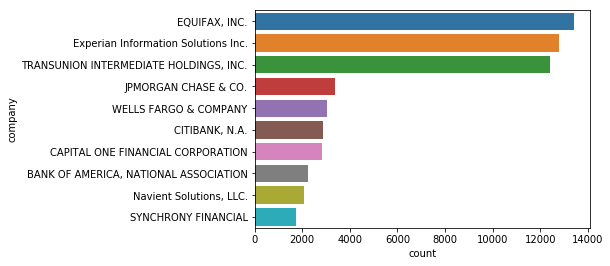

state


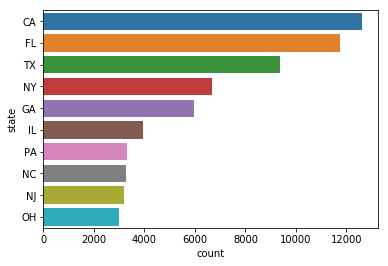

zip_code


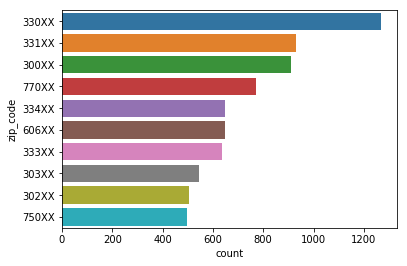

tags


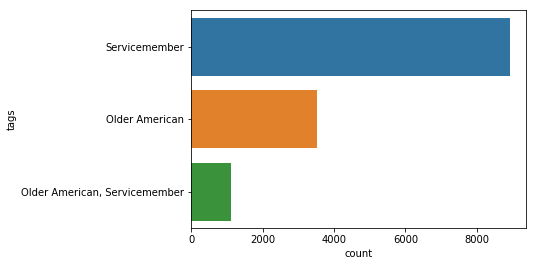

is_consumer_consent_provided


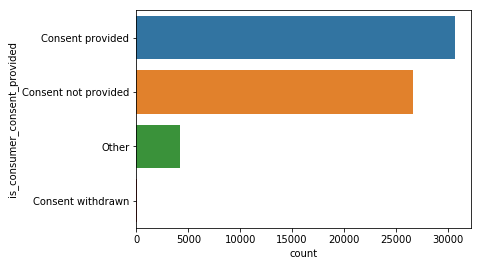

submittted_via


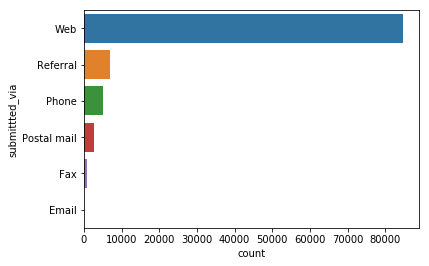

date_sent_to_company


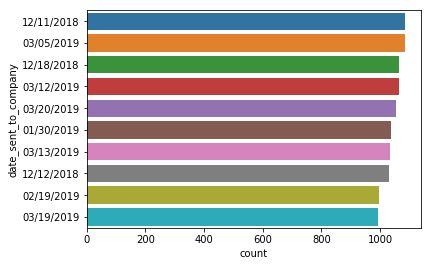

company_response_to_consumer


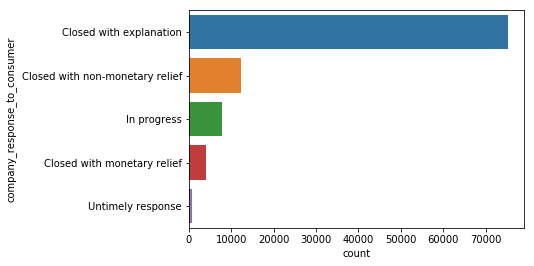

timely_response


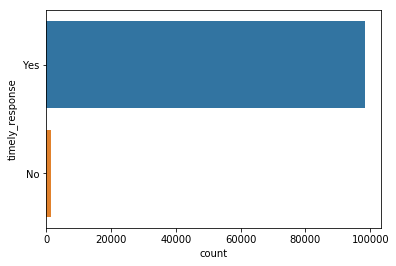

consumer_disputed


In [18]:
for feature in clean_table.dtypes[clean_table.dtypes == 'object'].index:
    print(feature)
    if(feature == 'consumer_disputed'):
        continue
    sns.countplot(y=feature, data=clean_table, 
                  order=clean_table[feature].value_counts().iloc[:10].index)
    plt.show()

# Standard Analysis - Check for segmentations
## Conversions by agent   

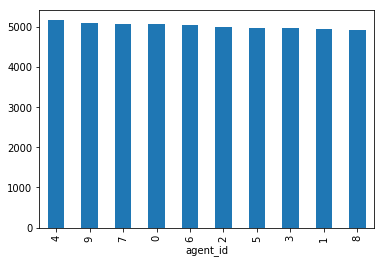

In [19]:
group_by_agent = clean_table.groupby(['agent_id']).sum()
group_by_agent = group_by_agent.sort_values('conversion',ascending=False)
group_by_agent['conversion']
group_by_agent['conversion'].plot.bar()

## Conversions by product

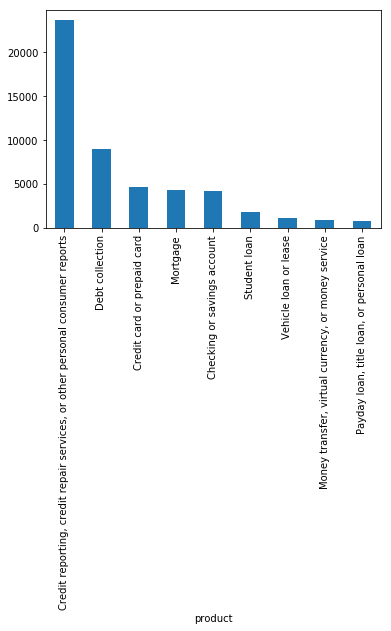

In [20]:
group_by_product = clean_table.groupby(['product']).sum()
group_by_product = group_by_product.sort_values('conversion',ascending=False)
group_by_product['conversion']
group_by_product['conversion'].plot.bar()

# Standard Analysis - Check for correlations (HEATMAP)

In [21]:
correlations = clean_table.corr()

In [22]:
# create a mask with 23,23 dimensionality and trim them from the middle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

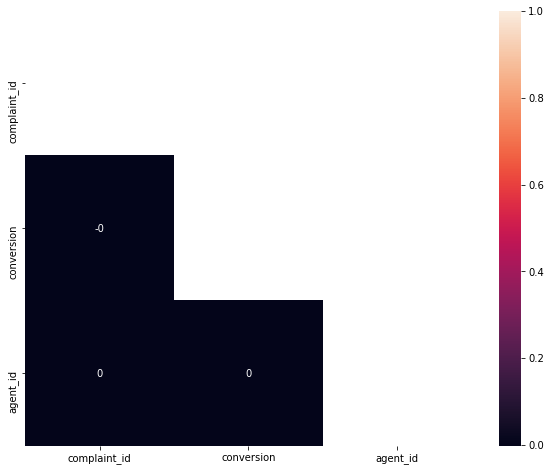

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.0f', mask=mask)

---
# Save Clean Table

In [24]:
# clean_table.to_csv('../data/clean_table.csv', index=False)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677,1,5
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132,0,3
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788,0,9
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284,1,4


# Transform to Excel

In [25]:
# clean_table.to_excel("../data/customer_complaints.xlsx")

---
# Data Cleaning

## Handle missing values

In [26]:
def display_missing_values():
    print( (clean_table.isnull().sum() * 1000 // len(clean_table))/10 )

display_missing_values()

date_received                     0.0
product                           0.0
sub_product                       0.0
issue                             0.0
sub_issue                        12.8
consumer_complaint_narrative     69.2
company_public_response          51.7
company                           0.0
state                             2.9
zip_code                         14.0
tags                             86.4
is_consumer_consent_provided     38.3
submittted_via                    0.0
date_sent_to_company              0.0
company_response_to_consumer      0.0
timely_response                   0.0
consumer_disputed               100.0
complaint_id                      0.0
conversion                        0.0
agent_id                          0.0
dtype: float64


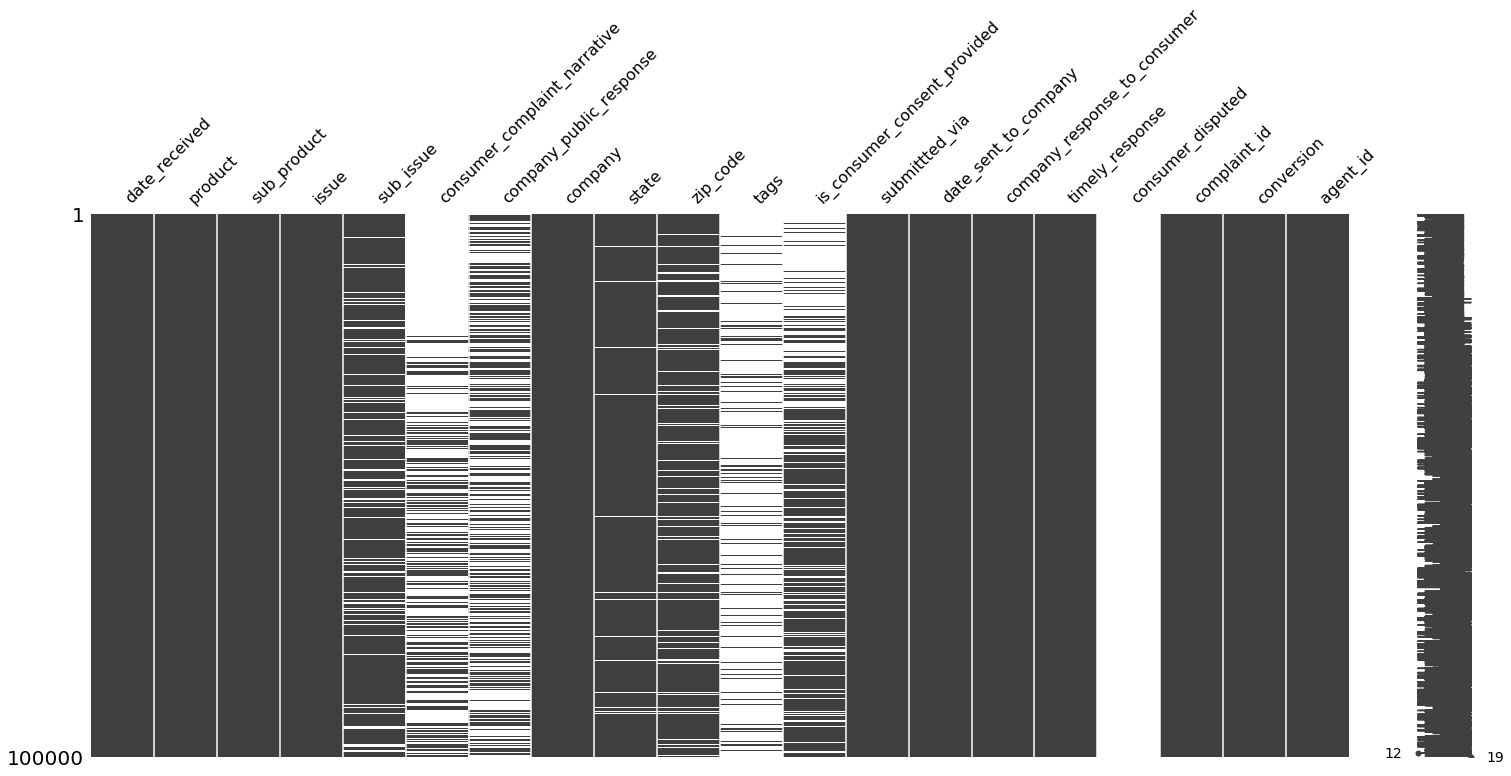

In [27]:
msno.matrix(clean_table)

# Conclusion
A lot of missing data.   
Missing Tags 86% - evaluation if this is really a relevant feature.  

Remove tags
Replace missing   
fields with 'Missing'

# Removing Tags

In [28]:
clean_table = clean_table.drop(['tags'], axis=1)
display_missing_values()

date_received                     0.0
product                           0.0
sub_product                       0.0
issue                             0.0
sub_issue                        12.8
consumer_complaint_narrative     69.2
company_public_response          51.7
company                           0.0
state                             2.9
zip_code                         14.0
is_consumer_consent_provided     38.3
submittted_via                    0.0
date_sent_to_company              0.0
company_response_to_consumer      0.0
timely_response                   0.0
consumer_disputed               100.0
complaint_id                      0.0
conversion                        0.0
agent_id                          0.0
dtype: float64


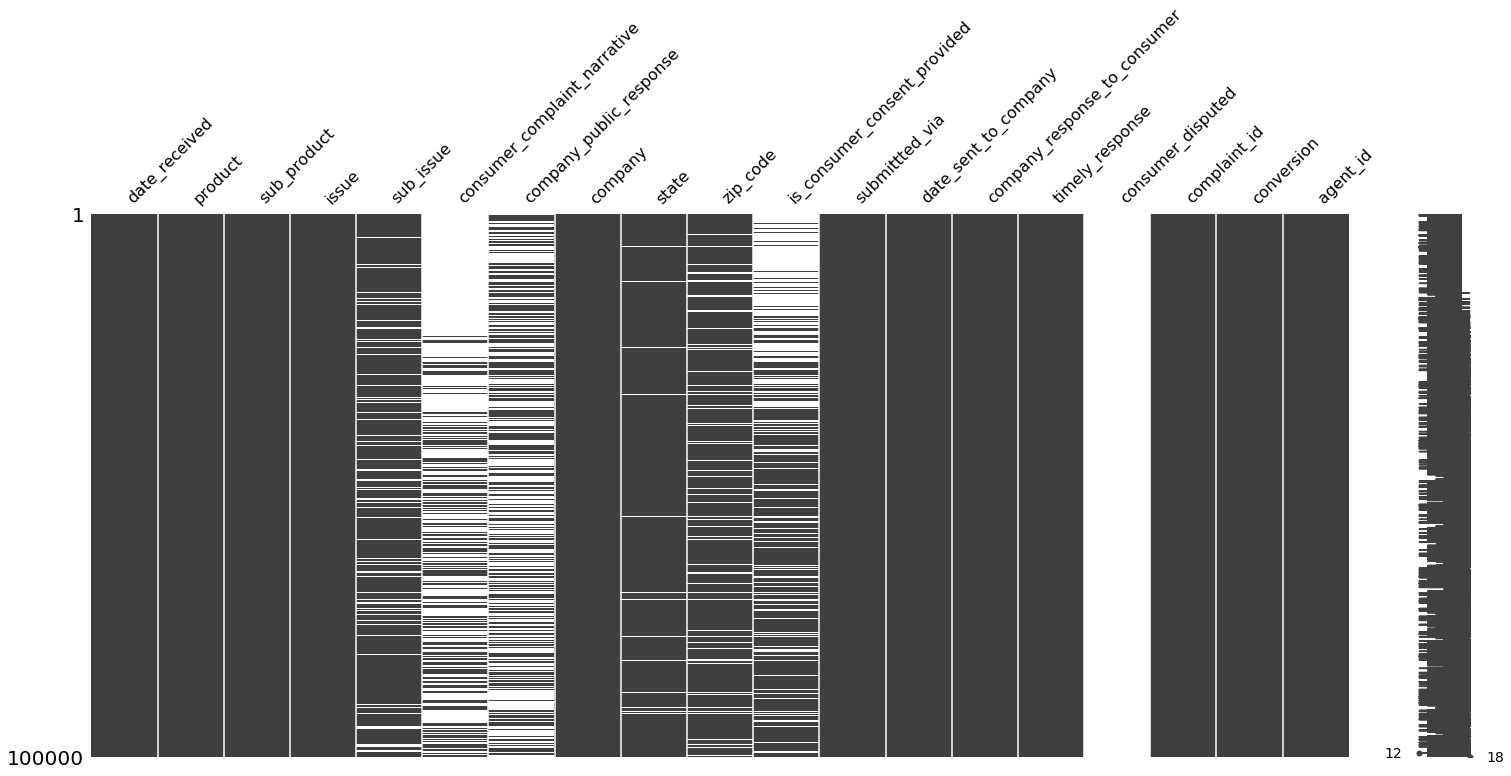

In [29]:
msno.matrix(clean_table)

# Fill missing values

In [30]:
for column in clean_table.select_dtypes(include=['object']):
    clean_table[column] = clean_table[column].fillna('Missing')

display_missing_values()

date_received                   0.0
product                         0.0
sub_product                     0.0
issue                           0.0
sub_issue                       0.0
consumer_complaint_narrative    0.0
company_public_response         0.0
company                         0.0
state                           0.0
zip_code                        0.0
is_consumer_consent_provided    0.0
submittted_via                  0.0
date_sent_to_company            0.0
company_response_to_consumer    0.0
timely_response                 0.0
consumer_disputed               0.0
complaint_id                    0.0
conversion                      0.0
agent_id                        0.0
dtype: float64


# Remove Outlier

In [31]:
# TODO

# Fix Structural Errors

In [32]:
# TODO

# Text preprocessing

In [33]:
text_table = clean_table.copy()
text_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,Missing,Missing,CURO Intermediate Holdings,MO,Missing,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,Missing,Missing,"Medical Data Systems, Inc.",PA,180XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3204677,1,5
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,Missing,Missing,"Diversified Consultants, Inc.",MD,207XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205132,0,3
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,Missing,Missing,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3204788,0,9
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,Missing,Missing,Missing,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205284,1,4


In [34]:
text_table['consumer_complaint_narrative'] = text_table['consumer_complaint_narrative'].replace('Missing','')


In [35]:
transcripts = text_table['consumer_complaint_narrative']
len(transcripts)

100000

In [36]:
corpus_all_in_one = ' '.join([transcript for transcript in transcripts])
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Corpus size (char): 32565474


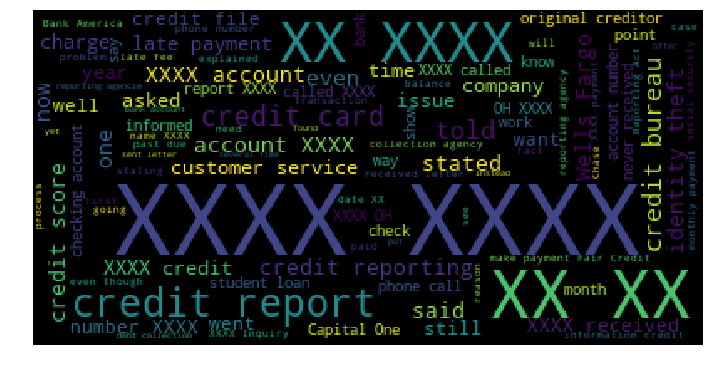

In [37]:
cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [50]:
def display_most_common_words(data):
    stop_list = stopwords.words('english') + list(string.punctuation)

    document_frequency = Counter()

    for content in data:
        #try:  # py3
        tokens = word_tokenize(content)
        #except UnicodeDecodeError:  # py27
        #    tokens = word_tokenize(content.decode('utf-8'))
        unique_tokens = [token.lower() for token in set(tokens)
                         if token.lower() not in stop_list]
        document_frequency.update(unique_tokens)

    for word, freq in document_frequency.most_common(20):
        print("{}\t{}".format(word, freq))

display_most_common_words(transcripts)

xxxx	24066
credit	20854
account	15433
report	12635
information	9801
would	9180
xx/xx/xxxx	8479
received	8244
company	7969
never	7790
time	7635
also	7472
called	7428
reporting	7143
sent	7093
payment	7042
told	6946
get	6223
please	6205
one	6180


---
# Feature Engineering

In [40]:
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,Missing,Missing,CURO Intermediate Holdings,MO,Missing,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,Missing,Missing,"Medical Data Systems, Inc.",PA,180XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3204677,1,5
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,Missing,Missing,"Diversified Consultants, Inc.",MD,207XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205132,0,3
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,Missing,Missing,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Missing,Web,04/08/2019,Closed with explanation,Yes,Missing,3204788,0,9
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,Missing,Missing,Missing,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,Missing,Web,04/08/2019,In progress,Yes,Missing,3205284,1,4


## Create new feature for the length of the transcript.   

In [51]:
lengths = [0]*clean_table.shape[0]

for idx, element in enumerate(transcripts):
    if element == 'Missing':
        lengths[idx] = 0
        continue
    lengths[idx] = len(clean_table['consumer_complaint_narrative'][idx])

clean_table['length_transcripts'] = lengths
    

## Create new feature for the word count of the transcript.

In [52]:
word_counts = [0]*clean_table.shape[0]

for content in transcripts:
    tokens = word_tokenize(content)
    word_counts[idx] = len(tokens)
        
clean_table['word_count_transcripts'] = word_counts
    

In [53]:
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id,length_transcripts,word_count_transcripts
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,Missing,Missing,CURO Intermediate Holdings,MO,Missing,...,Web,04/08/2019,Closed with explanation,Yes,Missing,3205347,0,8,7,0
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,Missing,Missing,"Medical Data Systems, Inc.",PA,180XX,...,Web,04/08/2019,In progress,Yes,Missing,3204677,1,5,7,0
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,Missing,Missing,"Diversified Consultants, Inc.",MD,207XX,...,Web,04/08/2019,In progress,Yes,Missing,3205132,0,3,7,0
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,Missing,Missing,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,...,Web,04/08/2019,Closed with explanation,Yes,Missing,3204788,0,9,7,0
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,Missing,Missing,Missing,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,...,Web,04/08/2019,In progress,Yes,Missing,3205284,1,4,7,0


---
# Text Classification

## Sentiment analysis of narrative

## Print the top 15 words said by each agent

Get only rows with transcript

In [44]:
transcript_table = clean_table[clean_table['consumer_complaint_narrative'] != 'Missing']

In [45]:
transcript_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id,length_transcripts,word_count_transcripts
14553,03/10/2019,Debt collection,Other debt,False statements or representation,"Impersonated attorney, law enforcement, or gov...",This company is not licensed to collect in my ...,Company believes it acted appropriately as aut...,LINEBARGER GOGGAN BLAIR & SAMPSON LLP,NC,283XX,...,Web,03/18/2019,Closed with explanation,Yes,Missing,3175219,1,4,197,0
15704,03/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,The collection company reported an verified ac...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,071XX,...,Web,03/08/2019,Closed with explanation,Yes,Missing,3173222,0,8,96,0
16254,03/08/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Febuary XXXX - XXXX XXXX XXXX XXXX XXXX FIRST...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,773XX,...,Web,03/12/2019,Closed with explanation,Yes,Missing,3173661,0,0,449,0
16344,03/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I am a victim of identity theft and identity f...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,936XX,...,Web,03/07/2019,Closed with explanation,Yes,Missing,3172639,1,5,250,0
16428,03/07/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"On XX/XX/XXXX, I was using XXXX airport parki...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,Missing,...,Web,03/13/2019,Closed with explanation,Yes,Missing,3172905,1,1,543,0


In [46]:
transcript_table.groupby(['agent_id'])['conversion','length_transcripts','word_count_transcripts'].sum()

,conversion,length_transcripts,word_count_transcripts
agent_id,,,
0,1525,3195426,0
1,1503,3218375,0
2,1545,3201952,0
3,1539,3194619,0
4,1555,3244181,0
5,1547,3246146,58
6,1583,3348000,0
7,1578,3250703,0
8,1534,3318881,0


## Count bad words per call
like issue and so on

# Finished Model

In [47]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

from wordcloud import WordCloud

import seaborn as sns
import missingno as msno

from sqlalchemy import (create_engine, MetaData)


class CustomerAgentConversionModel():
    def __init__(self):
        self.DATA_PATH = '../data/consumer_complaints.csv'
        self.header = {
            'Date received': 'date_received',
            'Product': 'product',
            'Sub-product':'sub_product',
            'Issue':'issue',
            'Sub-issue':'sub_issue',
            'Consumer complaint narrative':'consumer_complaint_narrative',
            'Company public response':'company_public_response',
            'Company':'company',
            'State':'state',
            'ZIP code':'zip_code',
            'Tags':'tags',
            'Consumer consent provided?':'is_consumer_consent_provided',
            'Submitted via':'submittted_via',
            'Date sent to company':'date_sent_to_company',
            'Company response to consumer':'company_response_to_consumer',
            'Timely response?':'timely_response',
            'Consumer disputed?':'consumer_disputed',
            'Complaint ID':'complaint_id',
        }
        # other properties would be the database connection, ...
    
    def load_csv(self):
        return pd.read_csv(DATA_PATH)
    
    def clean_data(self, data): 
        data = self.map_header(data)
        data = self.remove_cols_with_too_much_missing_values(data)
        data = self.fill_missing_values(data)  
        return data
    
    def save_csv(self, data, path='../data/clean_table.csv'):
        data.to_csv(path, index=False)
        
    ### internal methods
        
    def map_header(self,data):
        data = data.rename(columns = self.header)
        return data
    
    def remove_cols_with_too_much_missing_values(self, data):
        return data.drop(['tags'], axis=1)
        
    def fill_missing_values(self,data):
        for column in data.select_dtypes(include=['object']):
            data[column] = data[column].fillna('Missing')
        return data

    

In [48]:
# Let's try it out
model = CustomerAgentConversionModel()

data = model.load_csv()
data = model.clean_data(data)


/Users/deniel.horvatic/repository/machine-learning-masterclass/project_16_call_center_nlp/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [49]:
#model.save_csv(data)
